<a href="https://colab.research.google.com/github/Nihal27-sys/pandemic-sentiment-analysis/blob/main/pandemic-sentiment-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('nlptask.csv', encoding='latin1', on_bad_lines='skip', engine='python')

print("First 5 rows of data:")
print(df.head())

print("\nColumn Names:", df.columns)

First 5 rows of data:
   Unnamed: 0                   id  created_at  \
0           0  1386694264550270000  2021-04-26   
1           1  1386694260213170000  2021-04-26   
2           2  1386694256413320000  2021-04-26   
3           3  1386694252017630000  2021-04-26   
4           4  1386694248284700000  2021-04-26   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="https://mobile.twitter.com" rel="nofo...   
4  <a href="https://mobile.twitter.com" rel="nofo...   

                                       original_text lang  favorite_count  \
0  RT @VP: The U.S. is working closely with the I...   en             0.0   
1  RT @JackPosobiec: Flip-Flop Fauci admits outdo...   en             0.0   
2  RT @timmy315: Hi Twitter, Iâm Tim Manning, t...   en             0.0   
3  RT @itsaadee: Praying for #In

In [7]:
text_column = 'original_text'
label_column = 'sentiment'

def clean_text(text):
    if not isinstance(text, str): return ""
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

print("Cleaning text...")
df['Cleaned_Tweet'] = df[text_column].apply(clean_text)

print(df[[text_column, 'Cleaned_Tweet']].head(3))

Cleaning text...
                                       original_text  \
0  RT @VP: The U.S. is working closely with the I...   
1  RT @JackPosobiec: Flip-Flop Fauci admits outdo...   
2  RT @timmy315: Hi Twitter, Iâm Tim Manning, t...   

                                       Cleaned_Tweet  
0  rt vp the us is working closely with the india...  
1  rt jackposobiec flipflop fauci admits outdoor ...  
2  rt timmy hi twitter im tim manning the white h...  


In [8]:
vocab_size = 5000
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df['Cleaned_Tweet'])

sequences = tokenizer.texts_to_sequences(df['Cleaned_Tweet'])
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

encoder = LabelEncoder()
labels = encoder.fit_transform(df[label_column])
num_classes = len(np.unique(labels))
labels_cat = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

train_seq, test_seq, train_lab, test_lab = train_test_split(padded, labels_cat, test_size=0.2, random_state=42)

print(f"Data ready. Training on {len(train_seq)} samples.")

Data ready. Training on 28161 samples.


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_seq, train_lab,
                    epochs=5,
                    validation_data=(test_seq, test_lab),
                    verbose=1)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


881/881 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.4326 - loss: 1.0734 - val_accuracy: 0.5414 - val_loss: 0.9633
Epoch 2/5
881/881 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.6177 - loss: 0.8106 - val_accuracy: 0.8388 - val_loss: 0.4753
Epoch 3/5
881/881 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.8670 - loss: 0.4097 - val_accuracy: 0.8885 - val_loss: 0.3765
Epoch 4/5
881/881 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.8967 - loss: 0.3306 - val_accuracy: 0.8987 - val_loss: 0.3464
Epoch 5/5
881/881 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9077 - loss: 0.2906 - val_accuracy: 0.8990 - val_loss: 0.3456


/tmp/ipython-input-3741552838.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=label_column, data=df, palette='viridis')


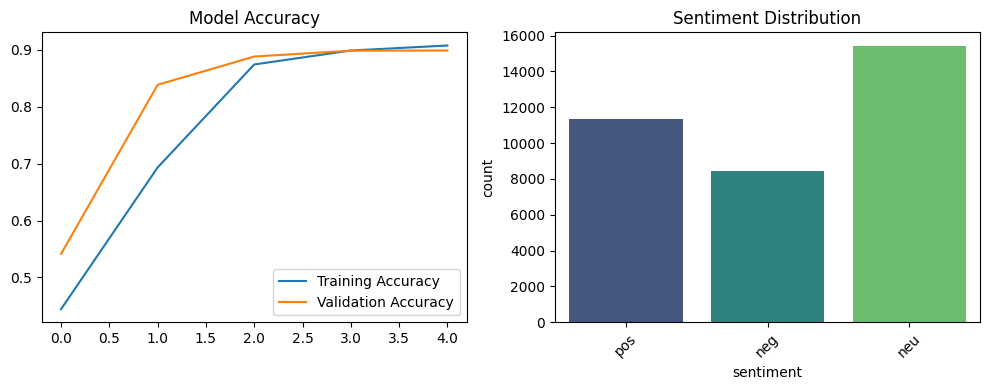

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
sns.countplot(x=label_column, data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
import re


def clean_text(text):
    if not isinstance(text, str): return ""
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text


def predict_sentiment(text):

    cleaned = clean_text(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)


    pred = model.predict(padded)
    label_index = np.argmax(pred)


    label = encoder.inverse_transform([label_index])[0]
    confidence = np.max(pred) * 100

    print(f"Text: '{text}'")
    print(f"Sentiment: {label} ({confidence:.2f}%)")
    print("-" * 30)


predict_sentiment("I am so scared of this virus, it is terrible.")
predict_sentiment("Washing hands and staying home is important.")
predict_sentiment("The vaccine news is amazing, I am so happy!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Text: 'I am so scared of this virus, it is terrible.'
Sentiment: neg (96.90%)
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Text: 'Washing hands and staying home is important.'
Sentiment: pos (95.58%)
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Text: 'The vaccine news is amazing, I am so happy!'
Sentiment: neu (97.92%)
------------------------------


In [12]:
model.save('sentiment_model.keras')
print("Model saved successfully!")

Model saved successfully!
